# Tree-Based Methods
### Aprendizagem Automática e Ciência de Dados

### Grupo 4
### Dinis Carraça Nº14058 & José Feiteira Nº14300

### AVALIAR ATRAVÉS DA MATRIZ DE CONFUSÃO PARA ALÉM DAS OUTRAS MÉTRICAS

In [1]:
%reset -f

## Requirements

In [2]:
!pip install -r requirements.txt


  Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pydot-3.0.2-py3-none-any.whl.metadata (10 kB)
Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached pydot-3.0.2-py3-none-any.whl (35 kB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.4.0

   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
    Uninstalling numpy-2.4.0:
   -------------------- ------------------- 1/2 [numpy]
      Successfully uninstalled numpy-2.4.0
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2 [numpy]
   -------------------- ------------------- 1/2

  You can safely remove it manually.
  You can safely remove it manually.


## Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score

from io import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report,recall_score, accuracy_score, precision_score

#import xgboost as xgb


## 0. Operações Gerais

In [5]:
df = pd.read_csv('df_group4_classe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_active_users_per_1k       255 non-null    float64
 1   avg_session_duration            255 non-null    float64
 2   screens_per_session             255 non-null    float64
 3   conversion_rate                 255 non-null    float64
 4   retention_30d                   255 non-null    float64
 5   crash_rate_per_1k               255 non-null    float64
 6   avg_latency_ms                  255 non-null    float64
 7   support_tickets_per_1k_users    255 non-null    float64
 8   bug_fix_time_days               255 non-null    float64
 9   deployment_frequency_per_month  255 non-null    float64
 10  nps_score                       255 non-null    float64
 11  app_store_rating                255 non-null    float64
 12  revenue_per_user                255 

In [6]:
df.head

<bound method NDFrame.head of      daily_active_users_per_1k  avg_session_duration  screens_per_session  \
0                     1.365073              0.767327             0.261780   
1                     0.014407             -0.053756            -0.834279   
2                    -0.794565             -1.364828            -0.794455   
3                    -0.025550             -0.712952            -0.362806   
4                    -0.008756              0.934050             1.951810   
..                         ...                   ...                  ...   
250                  -0.564947             -0.577750             0.066958   
251                   0.195084              0.137976            -0.233007   
252                  -0.464582              0.490636             0.161419   
253                   0.210654             -0.252353             0.001949   
254                   0.708200              1.074918            -0.054928   

     conversion_rate  retention_30d  crash_ra

In [7]:
x = df.drop(columns =['classe'])
y = df['classe'] # Output

In [8]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state = 42, stratify = y)

In [9]:
def avaliar_modelo(modelo, x_teste, y_teste):
    y_predi = modelo.predict(x_teste)
    
    print("Matriz de confusão:")
    print(confusion_matrix(y_teste, y_predi))
    print("\nMétricas:")
    print(f"Accuracy : {accuracy_score(y_teste, y_predi):.4f}")
    print(f"Precision: {precision_score(y_teste, y_predi, average='weighted'):.4f}")
    print(f"Recall   : {recall_score(y_teste, y_predi, average='weighted'):.4f}")
    #print(f"F1-score : {f1_score(y_test, y_pred, average='weighted'):.4f}")
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred))
    

## 1. Árvore de Decisão

Resultados Decision Tree
Matriz de confusão:
[[ 4  0  0  3  2]
 [ 0 11  5  1  1]
 [ 2  3 12  0  3]
 [ 2  2  2  9  0]
 [ 0  1  6  3  5]]

Métricas:
Accuracy : 0.5325
Precision: 0.5325
Recall   : 0.5325


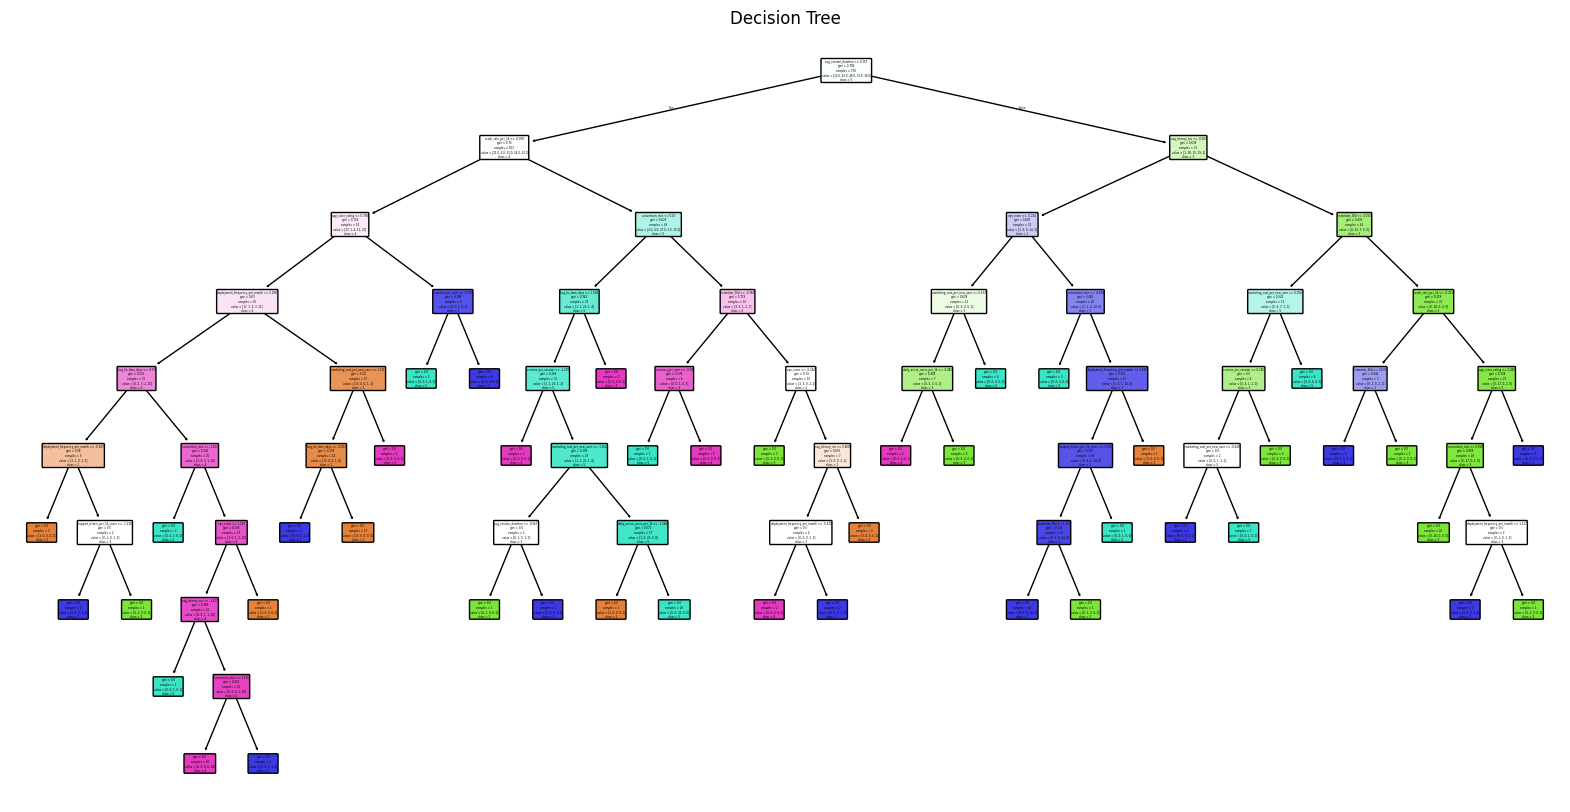

In [10]:
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(x_treino, y_treino)

print("Resultados Decision Tree")
avaliar_modelo(decision_tree, x_teste, y_teste)

plt.figure(figsize=(20,10))
plot_tree(
    decision_tree,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()


Após analisarmos os resultados gerados, chegamos a algumas conclusões:
- A Árvore de Decisão obteve uma accuracy de ~53%, com valores semelhantes de precision e recall, indicando desempenho equilibrado, porém limitado;
- Apesar disso pela análise da matriz de confusão, notamos que existe uma boa destribuição nas previsões das classes, isto é, os valores da diagonal estão todos perto uns dos outros, este facto justifica o baixo valor obtido na accuracy;
- 

## 2. Random Forest

Resultados Ramdom Forest
Matriz de confusão:
[[ 6  0  0  1  2]
 [ 0 14  1  1  2]
 [ 0  1 17  1  1]
 [ 0  0  2 13  0]
 [ 1  1  3  1  9]]

Métricas:
Accuracy : 0.7662
Precision: 0.7709
Recall   : 0.7662


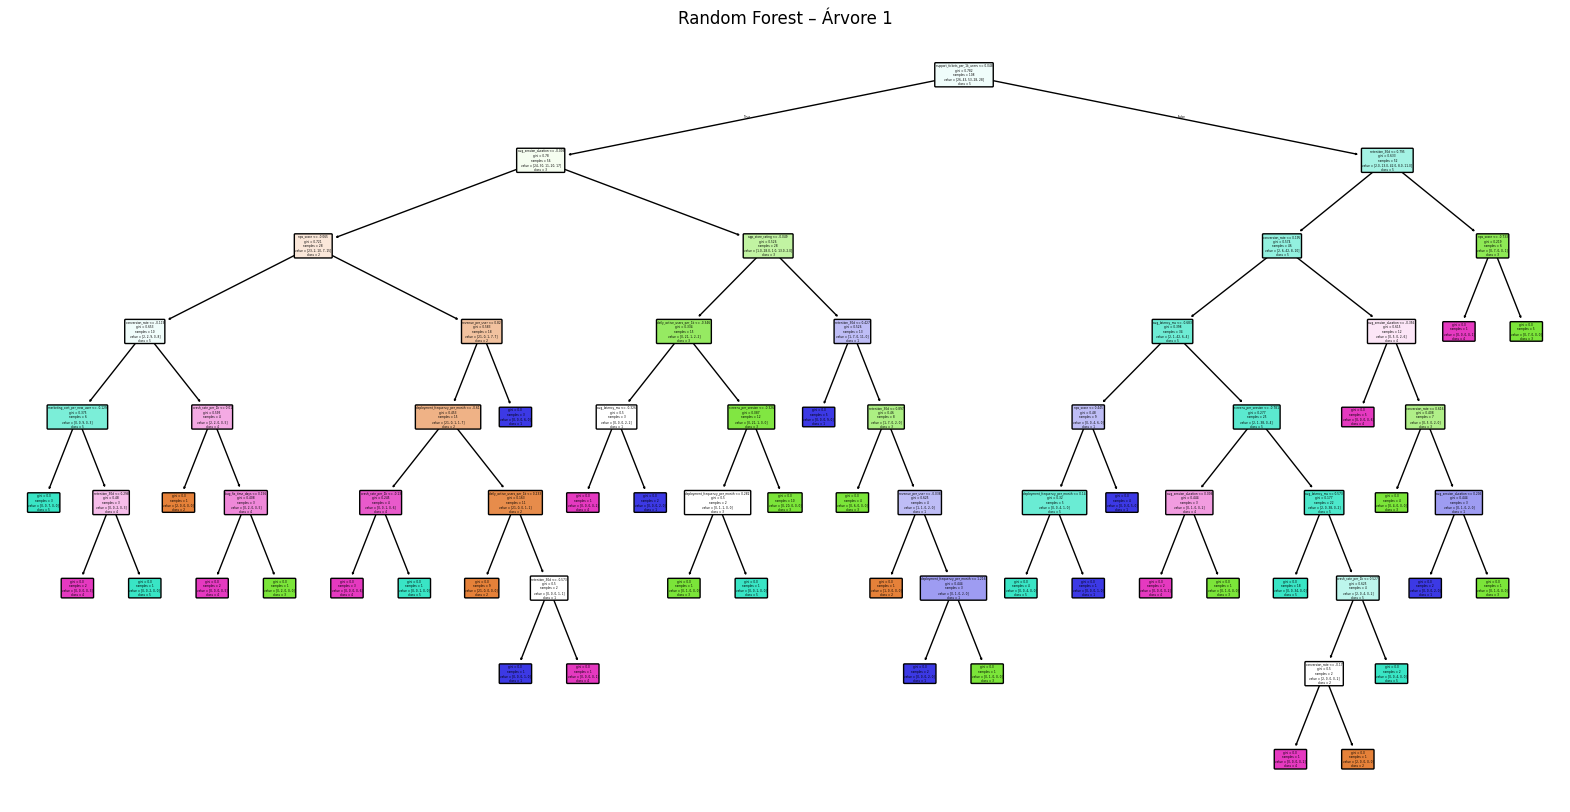

In [11]:
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(x_treino, y_treino)

print("Resultados Ramdom Forest")
avaliar_modelo(random_forest, x_teste, y_teste)

estimator = random_forest.estimators_[5]

plt.figure(figsize=(20,10))
plot_tree(
    estimator,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
)
plt.title("Random Forest – Árvore 1")
plt.savefig("random_forest.png", dpi=300, bbox_inches='tight')
plt.show()

Dos resultados acima conseguimos retirar as seguintes observações:

- O Random Forest obteve uma accuracy de ~76%, superando claramente o modelo anterior;
- É notável uma melhoria nas métricas de precision e recall;
- A matriz de confusão evidencia uma boa distribuição das previsões, 3 das 5 classes têm valores pouco distantes;
- Assim, as random forestt unem o melhor dos dois mundos, boas métricas e boa distribuição das previsões

## 3. Bagging

Resultados Bagging
Matriz de confusão:
[[ 8  0  0  1  0]
 [ 0 12  2  1  3]
 [ 0  2 16  1  1]
 [ 0  0  4 11  0]
 [ 1  1  3  2  8]]

Métricas:
Accuracy : 0.7143
Precision: 0.7209
Recall   : 0.7143


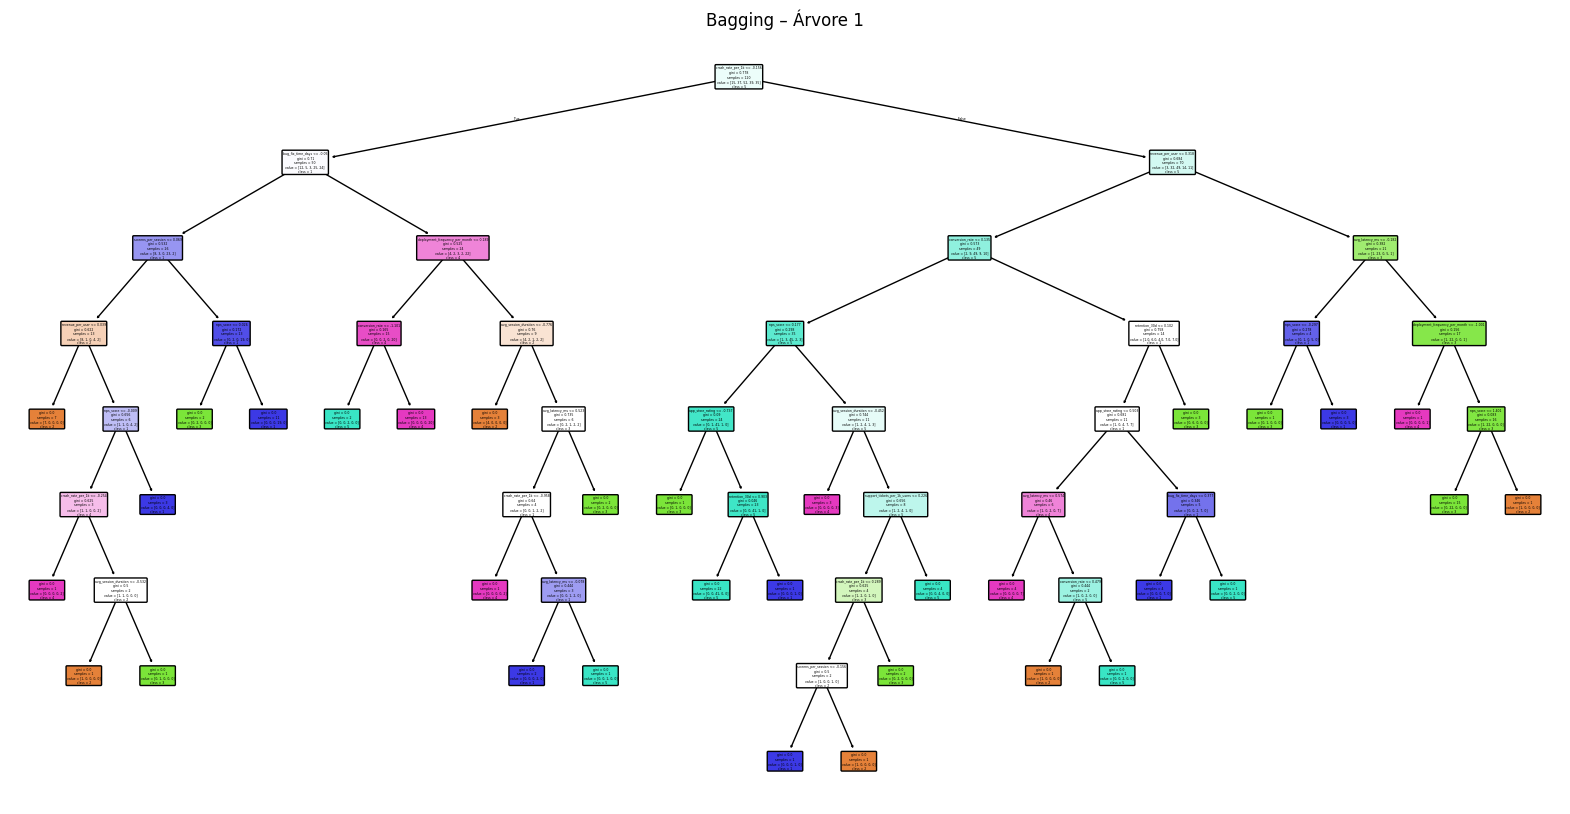

In [12]:
bagging = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(x_treino, y_treino)

print("Resultados Bagging")
avaliar_modelo(bagging, x_teste, y_teste)

estimator = bagging.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(
    estimator,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
)
plt.title("Bagging – Árvore 1")
plt.savefig("bagging.png", dpi=300, bbox_inches='tight')
plt.show()

As conclusões obtidas foram as seguintes:
- Obteve uma accuracy de ~71%, ligeira perda face às random forest;
- No entanto apresenta uma melhor distribuição na matriz de confusão;
- Assim, podemos afirmar que o método está em par com o random forest;

## 4. Boosting

### 4.1 AdaBoost

Resultados AdaBoost
Matriz de confusão:
[[ 6  0  1  0  2]
 [ 0 12  0  1  5]
 [ 0  2 12  2  4]
 [ 0  1  2 12  0]
 [ 2  2  1  1  9]]

Métricas:
Accuracy : 0.6623
Precision: 0.6812
Recall   : 0.6623


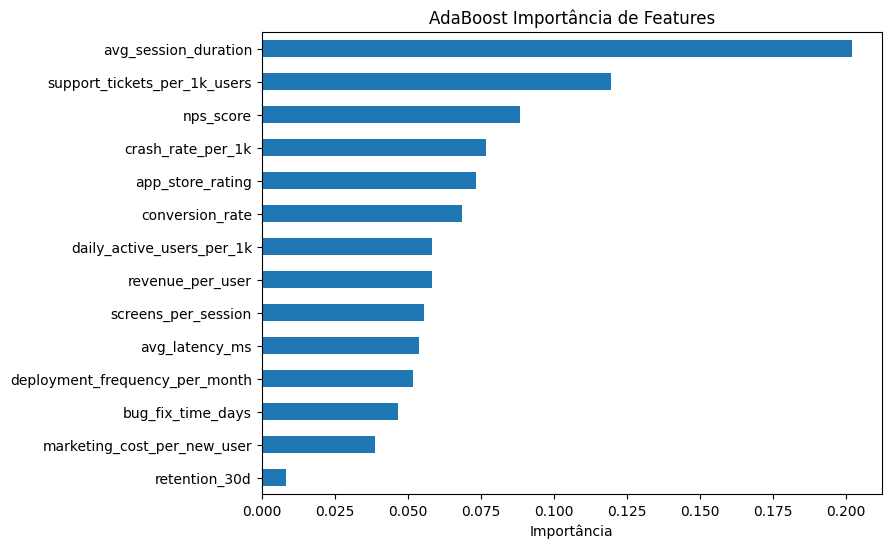

In [13]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42,algorithm='SAMME')
adaboost.fit(x_treino, y_treino)

print("Resultados AdaBoost")
avaliar_modelo(adaboost, x_teste, y_teste)

importancia = adaboost.feature_importances_
feat_imp = pd.Series(importancia, index=x.columns).sort_values()

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.title("AdaBoost Importância de Features")
plt.xlabel("Importância")
plt.savefig("adaboost.png", dpi=300, bbox_inches='tight')
plt.show()

As observações retiradas foram as seguintes:
- Accuracy de ~66%, com valores equilibrados de precision e recall;
- A matriz de confusão mostra, até ao momento, a melhor distribuição nos valores da diagonal;
- O AdaBoost apresenta desempenho competitivo entre os métodos avaliados, mesmo tendo métricas com menor valor.

### 4.2 Gradient Boosting

Resultados Gradient Boosting
Matriz de confusão:
[[ 3  0  1  1  4]
 [ 0 15  2  0  1]
 [ 0  1 13  3  3]
 [ 0  0  3 12  0]
 [ 2  1  1  1 10]]

Métricas:
Accuracy : 0.6883
Precision: 0.6910
Recall   : 0.6883


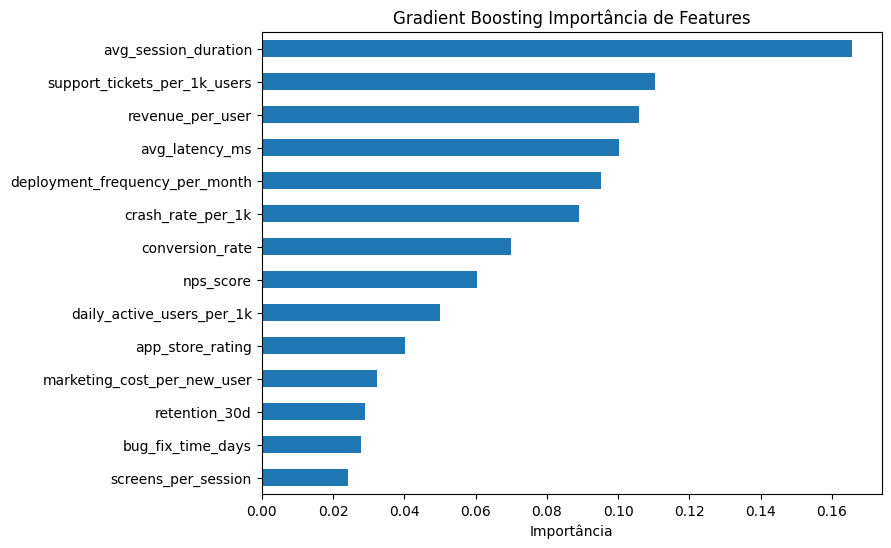

In [14]:
gradiente = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradiente.fit(x_treino, y_treino)

print("Resultados Gradient Boosting")
avaliar_modelo(gradiente, x_teste, y_teste)

importancias = gradiente.feature_importances_
feat_imp = pd.Series(importancias, index=x.columns).sort_values()

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.title("Gradient Boosting Importância de Features")
plt.xlabel("Importância")
plt.savefig("gradient_boosting.png", dpi=300, bbox_inches='tight')
plt.show()

Conclusões obtidas pelos resultados:
- Obteve uma accuracy de ~68%, com valores equilibrados de precision e recall.
- Observa-se um grande desfalque na previsão da classe 0 na matriz de confusão.
- Assim, apesar dos valores competitivos das métricas, a fraca distribuição na matriz de confusão pode levar a piores resultados comparando com os métodos anteriores.

## 5. Conclusões

Depois de realizados todos os métodos acima chegamos às seguintes conclusões gerais:

1. Um alto valor de accuracy pode induzir em erro, havendo então a necessidade de analisar a matriz de confusão de cada;
2. Os métodos que apresentaram melhor desempenho foram, Bagging e Boosting, mais especificamente o AdaBoost;
3. De entre estes dois o Adaboost tem o melhor balanço entre Métricas e Matriz de Confusão;

Assim, chegamos à conclusão de que, possivelmente, o AdaBoost será a melhor alternativa para suprir as nossas necessidades. Apesar disso vamos contabilizar também o Bagging de modo a tornar a nossa análise mais abragente.

## 4.3 XGBoost (Não funciona sem umas cenas todas maradas)

In [50]:
xgboost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,use_label_encoder=False)
xgboost.fit(x_treino, y_treino)

print("Resultados XGBoost")
avaliar_modelo(xgboost, x_teste, y_teste)

xgb.plot_importance(xgboost)
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

## APARTIR DAQUI NÃO CONTA

In [13]:
# decision tree regressor
regressor = DecisionTreeRegressor(
    criterion='squared_error', # RSS minimo  
    max_depth=None,
    max_features=None,
    max_leaf_nodes=3,
    min_impurity_decrease=0.0,  
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=None,
    splitter='best'
)

In [14]:
regressor.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

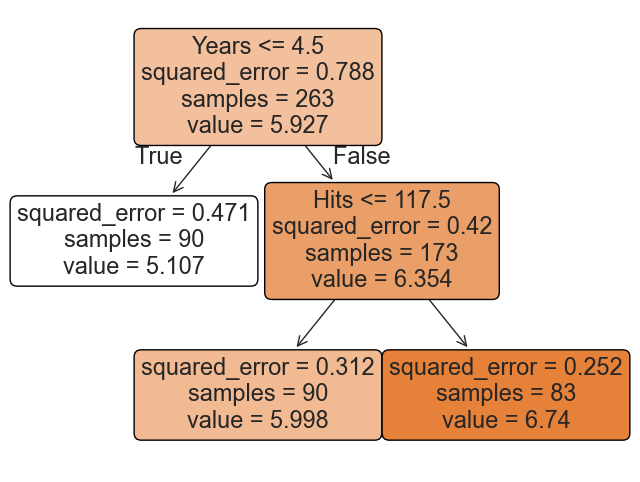

In [15]:

plt.figure(figsize=(8, 6))  
plot_tree(
    regressor,
    feature_names=['Years', 'Hits'],  
    filled=True,                      
    rounded=True                      
)
plt.show()

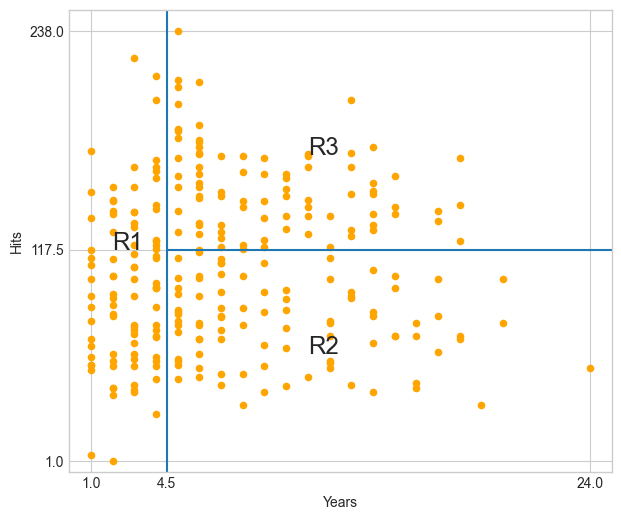

In [16]:
hitters_data.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

Post pruning is still not directly supported for decision trees.

## Classification Tree

In [17]:
heart_data = pd.read_csv('../datasets/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [18]:
heart_data.head(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [19]:
heart_data.ChestPain = pd.factorize(heart_data.ChestPain)[0]
heart_data.Thal = pd.factorize(heart_data.Thal)[0]

In [21]:
pd.factorize(heart_data.ChestPain)[1] # Transformar o objeto em inteiro

Index([0, 1, 2, 3], dtype='int64')

In [24]:
X2 = heart_data.drop('AHD', axis=1)
y2 = pd.factorize(heart_data.AHD)[0]
class_labels = pd.factorize(heart_data.AHD)[1] 
class_labels

Index(['No', 'Yes'], dtype='object')

In [25]:
heart_data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,1,140,241,0,0,123,1,0.2,2,0.0,2,Yes
298,45,1,0,110,264,0,0,132,0,1.2,2,0.0,2,Yes
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,2,Yes
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,2,Yes


In [26]:
classifier = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
classifier.fit(X2,y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [29]:
classifier.score(X2,y2)

0.8383838383838383

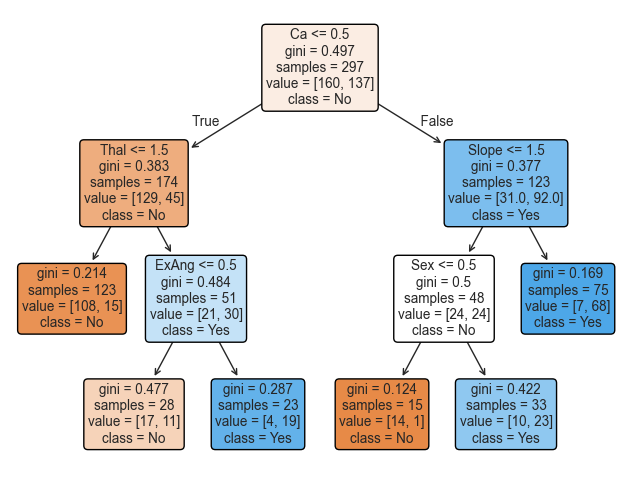

In [30]:



plt.figure(figsize=(8, 6))  
plot_tree(
    classifier,
    feature_names=X2.columns,  
    class_names=class_labels, 
    filled=True,                      
    rounded=True                      
)
plt.show()

## Comparing Bagging, Random Forests, and Boosting

In [31]:
boston_data = pd.read_csv('../datasets/BostonHousing.csv')
boston_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [32]:
boston_data.head

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [34]:
X = boston_data.drop('medv', axis=1) # Tirar o output value
y = boston_data.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # Para qualquer um conseguir reproduzir -> random state = 0

In [35]:
# post pruning not supported
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

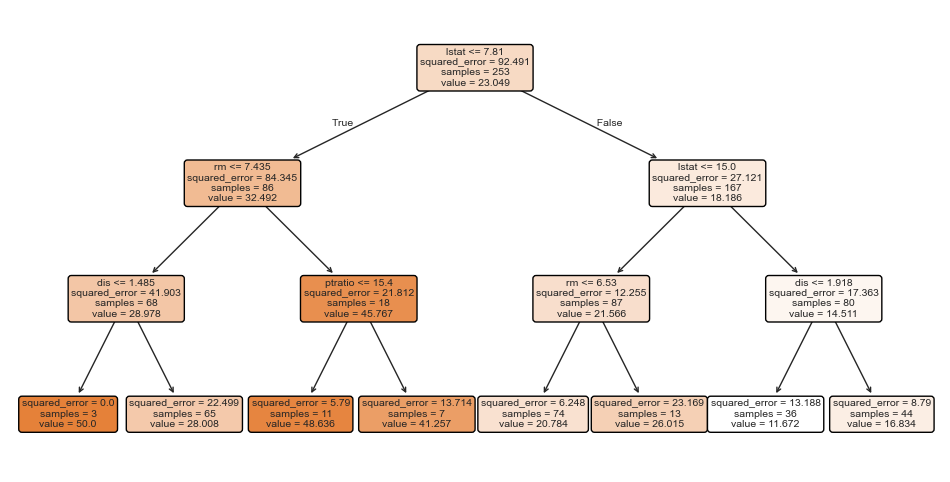

In [36]:

plt.figure(figsize=(12, 6))  
plot_tree(
    regr2,
    feature_names=X.columns,  
    filled=True,                      
    rounded=True                      
)
plt.show()

Text(0, 0.5, 'y_test')

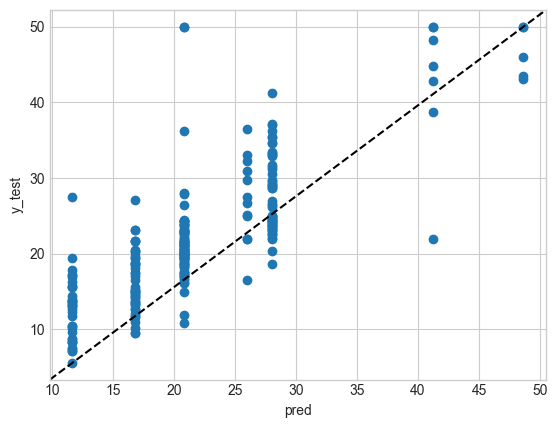

In [37]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [38]:
float(mean_squared_error(y_test, pred))

26.023230850097445

### Bagging (p = 13 features)

In [39]:
X.shape

(506, 13)

In [40]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

In [41]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features=13, n_estimators=10,
                      n_jobs=1, random_state=1)

Text(0, 0.5, 'y_test')

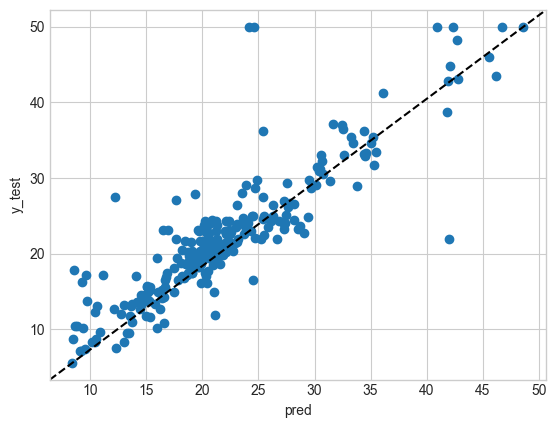

In [42]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [232]:
float(mean_squared_error(y_test, pred))

16.300959351778662

### Random Forests (6 features)

In [43]:

regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [44]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features=6, n_estimators=10,
                      n_jobs=1, random_state=1)

In [46]:
pred = regr2.predict(X_test)
float(mean_squared_error(y_test, pred))

15.82350045849802

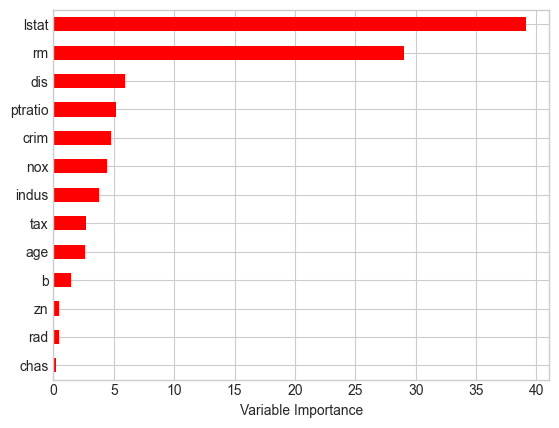

In [47]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Boosting

In [48]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

In [49]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', n_estimators=500,
                          random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
b           0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


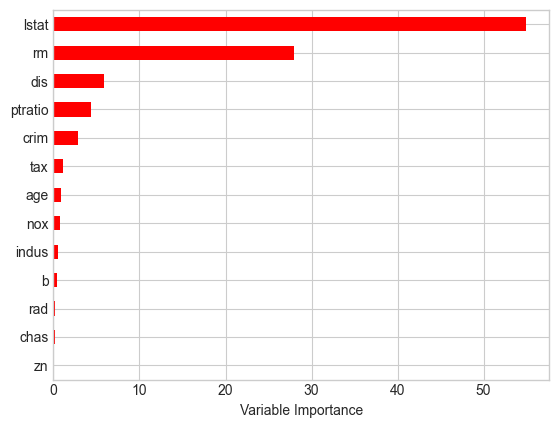

In [50]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [51]:
float(mean_squared_error(y_test, regr.predict(X_test)))

15.592155779633027

Text(0.5, 0, 'CRIM')

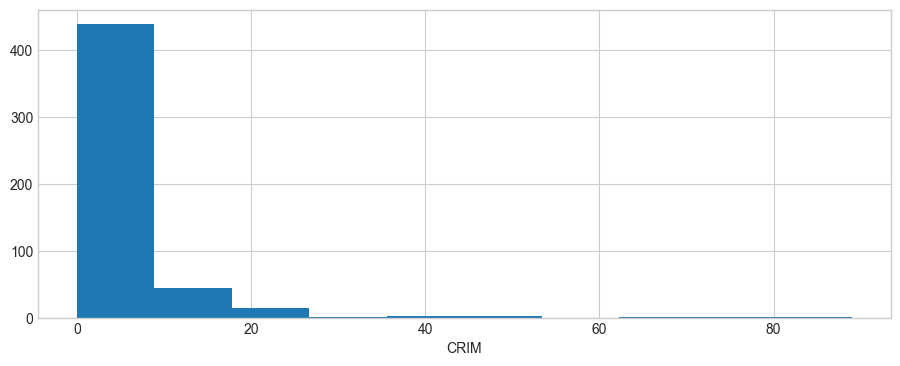

In [61]:
X = boston_data[['lstat', 'rm']].to_numpy()
y = boston_data.medv.to_numpy() 

fig, (ax1) = plt.subplots(1,figsize=(11,4))
ax1.hist(boston_data.crim.to_numpy())
ax1.set_xlabel('CRIM')